## **DEADLINE 18 JUNI**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data_train = pd.read_excel('https://github.com/FadlyHaikal/FlightDataset/blob/main/Data_Train.xlsx?raw=true')
data_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
#Data Clean
data_train.dropna(inplace=True)

EDA(Exploratory Data Analysis)

In [9]:
data_train['Journey_day'] = pd.to_datetime(data_train.Date_of_Journey,format = "%d/%m/%Y").dt.day
data_train['Journey_month'] = pd.to_datetime(data_train.Date_of_Journey,format = "%d/%m/%Y").dt.month
data_train=data_train.drop(['Date_of_Journey'], axis=1)

In [10]:
data_train['Dep_hour'] = pd.to_datetime(data_train.Dep_Time).dt.hour
data_train['Dep_min'] = pd.to_datetime(data_train.Dep_Time).dt.minute
data_train.drop(['Dep_Time'],axis = 1,inplace = True)

In [11]:
data_train['Arrival_hour'] = pd.to_datetime(data_train.Arrival_Time).dt.hour
data_train['Arrival_minute'] = pd.to_datetime(data_train.Arrival_Time).dt.hour
data_train.drop(['Arrival_Time'],axis=1,inplace =True)

In [12]:
duration = list(data_train['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h "+duration[i]

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))
    duration_mins.append(int(duration[i].split(sep = 'm')[0].split()[-1]))
data_train['Duration_hours'] = duration_hours
data_train['Duration_mins'] = duration_mins
data_train.drop(['Duration'],axis=1,inplace= True)

In [13]:
data_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,1,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,13,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,4,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,23,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,21,4,45


In [14]:
data_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [15]:
Airline = data_train[['Airline']]
Airline = pd.get_dummies(Airline,drop_first = True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [16]:
data_train['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [17]:
Source = data_train[['Source']]
Source = pd.get_dummies(Source,drop_first = True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [18]:
data_train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [19]:
Destination = data_train[['Destination']]
Destination = pd.get_dummies(Destination,drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [20]:
# dropping route columns because route and total stops are the same
data_train.drop(['Route',"Additional_Info"],axis = 1,inplace = True)

In [21]:
data_train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [22]:
# stops is an ordinal column so we will assign an order
data_train.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace = True)

In [23]:
training = pd.concat([data_train,Airline,Source,Destination],axis = 1)

In [24]:
# dropping airline, source and destination column because we made a dummies column before
training.drop(['Airline','Source','Destination'],axis = 1,inplace = True)

## Feature Selection

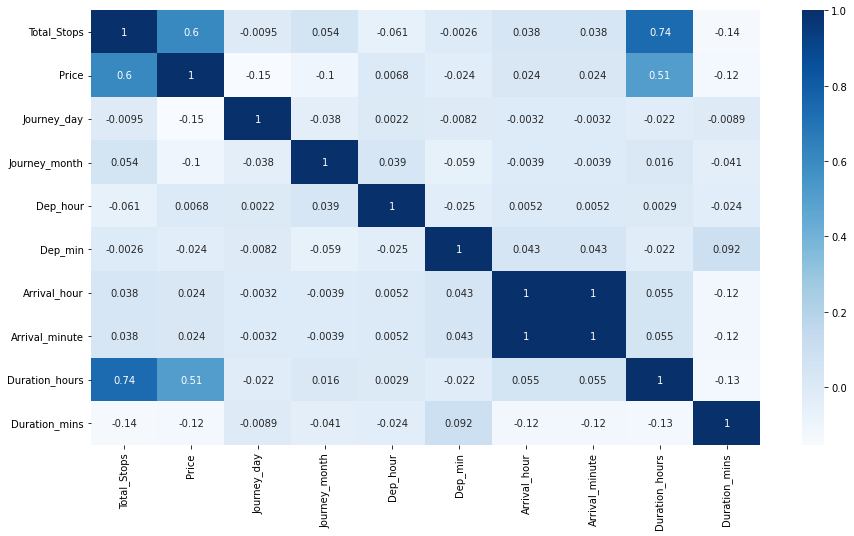

In [25]:
import seaborn as sns

plt.figure(figsize = (15,8))
sns.heatmap(data_train.corr(),annot = True,cmap = "Blues")
plt.show()

In [26]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

NameError: ignored

In [ ]:
print(selection.feature_importances_)

[2.07914103e-01 1.44091939e-01 5.52688750e-02 2.36734169e-02
 2.24413108e-02 2.08002047e-02 2.03287354e-02 1.45751573e-01
 2.03317417e-02 8.18738464e-03 1.80365491e-03 1.71483616e-02
 1.41290198e-01 6.74379166e-02 1.92550650e-02 8.70919822e-04
 2.41053960e-03 1.01006654e-04 4.69681866e-03 6.50364396e-05
 4.43903347e-04 9.11391046e-03 3.47279745e-03 4.96215208e-03
 8.63294016e-03 1.56352654e-02 8.81852159e-03 3.87205759e-04
 2.46645024e-02]


## Modeling

In [27]:
X = training.drop(columns=['Price'])
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,1,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,13,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,4,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,23,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,21,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
y = training['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**Using RandomForestRegressor**

In [30]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
model = reg_rf.fit(X_train,y_train)

In [31]:
reg_rf.score(X_train,y_train)

0.9533239240014204

In [ ]:
reg_rf.score(X_test,y_test)

0.7981425158079303

**Using LinearRegression**

In [ ]:
#Using LinearRegression
from sklearn.linear_model import LinearRegression
reg_lr= LinearRegression()
reg_lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
reg_lr.score(X_train,y_train)

0.6240290174716088

In [ ]:
reg_lr.score(X_test,y_test)

0.6196996504720647

## Test Model

In [2]:
!pip install joblib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print(X_test.columns)

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_minute', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')


In [32]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
import joblib

joblib.dump(model, 'prediction-model.joblib')

['prediction-model.joblib']